In [1]:
import pandas as pd
import numpy as np
import talib as ta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# 데이터 불러오기
df = pd.read_csv('bitcoin_data.csv')
df.dropna(inplace=True)

# 이동평균 계산
df['MFI'] = ta.MFI(df['high'], df['low'], df['close'], df['volume'], timeperiod=14)
df.dropna(inplace=True)

# 입력 데이터와 타겟 값 생성
X = df[['MFI']].values
Y = df['close'].values

# 데이터 스케일링
scaler = MinMaxScaler()

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.2, shuffle=False,
                                                    random_state=0)

# X 학습 테스트
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Y 학습 테스트
Y_train = scaler.fit_transform(Y_train.reshape(-1, 1)).flatten()
Y_test = scaler.fit_transform(Y_test.reshape(-1, 1)).flatten()

# 전체 비교용 X Y
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1)).flatten()

# 모델 구축
model = LinearRegression()

# 모델 학습
model.fit(X_train, Y_train)

# 테스트 데이터 예측
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(X_scaled)

# 예측 결과 역스케일링
Y_pred_scaled = scaler.inverse_transform(Y_pred.reshape(-1, 1)).flatten()
Y_pred_scaled_all = scaler.inverse_transform(Y_pred_all.reshape(-1, 1)).flatten()
Y_test_scaled = scaler.inverse_transform(Y_scaled.reshape(-1, 1)).flatten()

print(Y_pred_scaled)

[24238714.8806737  24214210.81882344 24174467.49832656 23473655.77084434
 23427427.75363399 23481763.32709627 22979412.5929547  23376975.58882163
 23431674.63016823 23513724.39348637 23628354.18365543 24054471.57432322
 23958484.59022707 24037176.7659382  24064481.30761695 24049035.65819536
 24155258.91524152 24826827.51310151 24997655.72779004 25646871.10631439
 25988238.0587691  25398657.45249566 25421620.35545458 25216557.01774586
 25393999.10788648 25408441.46421673 25646487.38392073 25347063.73193296
 25353503.84773052 25358741.64476652 25194398.49927426 25155551.91214341
 25061448.64210987 24370830.70830444 23866115.22547863 24740178.64846389
 24639699.60706439 24850539.84551897 24265676.45004866 23625109.81908341
 23627176.391389   24149957.94377796 24058870.14532173 23998691.23394822
 24150221.27330699 23593773.08143919 23806001.60792163 24284883.22034272
 24203611.33537481 24209972.05647099 24304858.90424901 24608948.76623836
 25364597.26412029 25983627.02213099 26025485.66213

In [3]:
r2_train = r2_score(Y_train, model.predict(X_train))
r2_test = r2_score(Y_test, model.predict(X_test))

print(f"[r2_score] train : {r2_train} / test : {r2_test}")

# mse
mse = mean_squared_error(Y_test, Y_pred)
# rmse
rmse = np.sqrt(mse)

print(f'[MSE] : {mse:.3f}\n[RMSE] : {rmse:.3f}')

[r2_score] train : 0.0025728184051745373 / test : -0.16084286634610234
[MSE] : 0.056
[RMSE] : 0.237


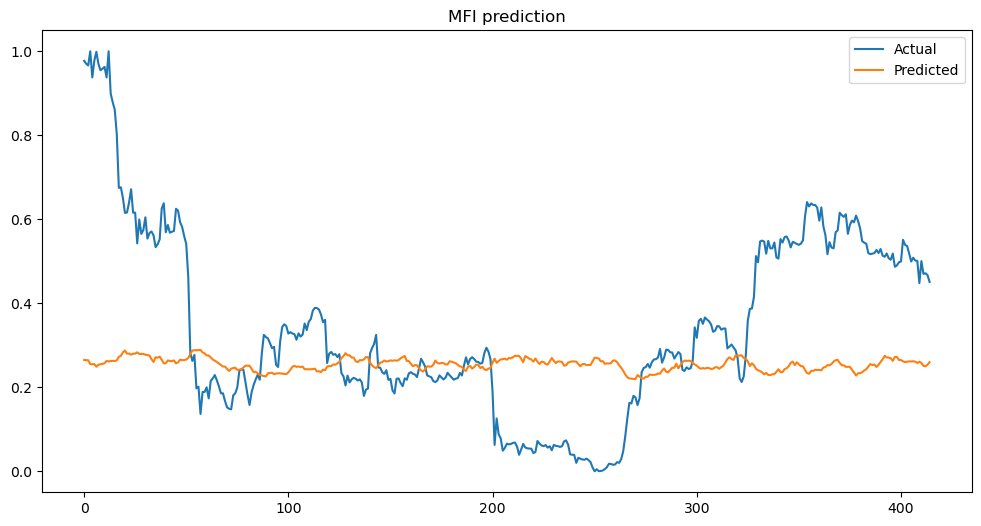

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(Y_test, label='Actual')
plt.plot(Y_pred, label='Predicted')
plt.title('MFI prediction')
plt.legend()
plt.show()